<a href="https://colab.research.google.com/github/terurium/-traffic_accident_survey/blob/main/%E4%BA%A4%E9%80%9A%E4%BA%8B%E6%95%85%E7%B5%B1%E8%A8%88.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

朝日新聞の「見えない交差点」に使われていた警察庁の交通事故統計のオープンデータを人間が読めるように変換しています。  
項目が50項目以上あり、交差点以外の事故検証にも有用で日々の取材で記者が参照できるよう、ある程度に読める形にデータを変換しておいたほうがよいかと。  
あと、いちいちQGISに持っていくのも面倒なのでgeopandasである程度プロットできるようにしとく。
コードブックをいくつか変換していますが、道路コードとかはまだ未着手です。

この辺を参考にgspreadをimport  
https://colab.research.google.com/notebooks/io.ipynb#scrollTo=6d0xJz3VzLOo  
https://github.com/burnash/gspread#more-examples  

In [9]:
!pip install --upgrade gspread
#print(gspread.__version__)

  Attempting uninstall: gspread
    Found existing installation: gspread 3.4.2
    Uninstalling gspread-3.4.2:
      Successfully uninstalled gspread-3.4.2


In [8]:
#import necessary library to mount personal Google Drive
#from google.colab import drive
#drive.mount('/content/drive')

In [10]:
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

Googleスプレッドシートでコード表を読み込む  
https://www.npa.go.jp/publications/statistics/koutsuu/opendata/index_opendata.html  
※まだ整備しきれていない。道路コードとか  
シートごとにcsvにするとか他にも方法はあるけど、各シートは管理が面倒なので5行目から読み込む形で管理。  
コード表はpdfだったのでtabulaで変換してシートの素を作っている。

In [11]:
# You can open a spreadsheet by its title as it appears in Google Docs
sh = gc.open('tabula-codebook_2020') # <-- Look ma, no keys!

In [12]:
# Get a list of all worksheets
worksheet_list = sh.worksheets()

#worksheet_list表示用 index番号でコード表読み込むための一覧
w = [str(i) + ": " + str(x) for i,x in enumerate(worksheet_list)]
w

["0: <Worksheet 'tabula-codebook_2020' id:1029121391>",
 "1: <Worksheet '車両単独事故の対象物' id:1045729000>",
 "2: <Worksheet '事故類型高速' id:1757923304>",
 "3: <Worksheet '当事車両台数' id:1121505160>",
 "4: <Worksheet 'トンネル番号' id:1463287440>",
 "5: <Worksheet '縦断勾配' id:125961682>",
 "6: <Worksheet '曲線半径' id:1238508689>",
 "7: <Worksheet '道路構造' id:1763716831>",
 "8: <Worksheet '道路区分' id:495773390>",
 "9: <Worksheet '道路管理者区分' id:323550055>",
 "10: <Worksheet '発生地点' id:1651705495>",
 "11: <Worksheet '乗車等の区分' id:681727601>",
 "12: <Worksheet '補充票番号' id:1038853668>",
 "13: <Worksheet '乗車別' id:1816253712>",
 "14: <Worksheet '祝日' id:255320149>",
 "15: <Worksheet '曜日' id:321429406>",
 "16: <Worksheet '人身損傷程度' id:1249710298>",
 "17: <Worksheet 'エアバッグの装備' id:112300722>",
 "18: <Worksheet 'サイドエアバッグの装備' id:2003821478>",
 "19: <Worksheet '車両の衝突部位' id:1178123980>",
 "20: <Worksheet '速度規制(指定のみ)' id:2059545322>",
 "21: <Worksheet '車両の損壊程度' id:291017433>",
 "22: <Worksheet '車両形状' id:340553712>",
 "23: <Worksheet '用途別'

In [13]:
#各シートを辞書にする
dict_list = []
for i in worksheet_list:
  _values_list = i.get_values()
  _dict = { i[0]:i[1] for i in _values_list[3:]}
  dict_list.append(_dict)

csv読み込み

In [ ]:
import pandas as pd
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 500)

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks(tetete)/honhyo_2020.csv" ,dtype = object)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309178 entries, 0 to 309177
Data columns (total 58 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   資料区分               309178 non-null  object
 1   都道府県コード            309178 non-null  object
 2   警察署等コード            309178 non-null  object
 3   本票番号               309178 non-null  object
 4   事故内容               309178 non-null  object
 5   死者数                309178 non-null  object
 6   負傷者数               309178 non-null  object
 7   路線コード              309178 non-null  object
 8   上下線                309178 non-null  object
 9   地点コード              309178 non-null  object
 10  市区町村コード            309178 non-null  object
 11  発生日時　　年            309178 non-null  object
 12  発生日時　　月            309178 non-null  object
 13  発生日時　　日            309178 non-null  object
 14  発生日時　　時            309178 non-null  object
 15  発生日時　　分            309178 non-null  object
 16  昼夜                 3

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks(tetete)/honhyo_2020.csv" ,dtype = object)
df["地形"]= df["地形"].map(dict_list[40])
df["天候"]= df["天候"].map(dict_list[41])
df["昼夜"]= df["昼夜"].map(dict_list[42])
df["上下線"]= df["上下線"].map(dict_list[44])
df["道路形状"]= df["道路形状"].map(dict_list[37])
df["路面状態"]= df["路面状態"].map(dict_list[39])
df["信号機"]= df["信号機"].map(dict_list[36])
df["都道府県コード"]=df["都道府県コード"].map(dict_list[53])
df["事故内容"]=df["事故内容"].map(dict_list[50])

#警察署等コードは都道府県コードと組み合わせる
#df["警察署等コード"]=df["警察署等コード"].map(dict_list[52])

#路線コードは上四桁と下一桁で分割が必要
#df["路線コード"]=df["路線コード"].map(dict_list[50])
df["datetime"] = df["発生日時　　年"]+df["発生日時　　月"]+df["発生日時　　日"]+" "+df["発生日時　　時"]+":"+df["発生日時　　分"]
df.drop(['発生日時　　年', '発生日時　　月','発生日時　　日','発生日時　　時','発生日時　　分'], axis=1, inplace=True)
df["datetime"] = pd.to_datetime(df["datetime"])

In [ ]:
df.head(5)

,資料区分,都道府県コード,警察署等コード,本票番号,事故内容,死者数,負傷者数,路線コード,上下線,地点コード,市区町村コード,昼夜,天候,地形,路面状態,道路形状,環状交差点の直径,信号機,一時停止規制 標識（当事者A）,一時停止規制 表示（当事者A）,一時停止規制 標識（当事者B）,一時停止規制 表示（当事者B）,車道幅員,道路線形,衝突地点,ゾーン規制,中央分離帯施設等,歩車道区分,事故類型,年齢（当事者A）,年齢（当事者B）,当事者種別（当事者A）,当事者種別（当事者B）,用途別（当事者A）,用途別（当事者B）,車両形状（当事者A）,車両形状（当事者B）,速度規制（指定のみ）（当事者A）,速度規制（指定のみ）（当事者B）,車両の衝突部位（当事者A）,車両の衝突部位（当事者B）,車両の損壊程度（当事者A）,車両の損壊程度（当事者B）,エアバッグの装備（当事者A）,エアバッグの装備（当事者B）,サイドエアバッグの装備（当事者A）,サイドエアバッグの装備（当事者B）,人身損傷程度（当事者A）,人身損傷程度（当事者B）,地点 緯度（北緯）,地点 経度（東経）,曜日(発生年月日),祝日(発生年月日),datetime
0,1,北海道(札幌方面),059,0001,負傷,000,001,40010,上,0000,234,昼-明,曇,NaN,舗装-凍結,単路-その他,00,NaN,00,23,00,23,04,9,20,70,1,4,21,45,65,03,04,31,31,01,01,04,04,42,13,3,3,2,1,2,2,2,4,425637403,1413108483,2,3,2020-01-06 07:20:00
1,1,北海道(札幌方面),059,0002,負傷,000,001,40010,上,0000,213,NaN,晴,NaN,舗装-乾燥,単路-その他,00,NaN,00,23,00,23,04,9,01,70,1,4,21,65,45,03,13,31,01,01,11,10,10,80,16,2,2,2,2,2,2,4,2,424247129,1413908484,5,3,2020-01-16 06:39:00
2,1,北海道(札幌方面),059,0003,負傷,000,002,40130,上,0000,224,NaN,NaN,NaN,舗装-凍結,単路-その他,00,NaN,00,23,00,23,04,9,01,70,6,3,21,01,35,03,03,31,31,01,01,04,04,40,10,1,2,1,2,2,2,2,2,425256568,1413936088,1,3,2020-01-05 06:15:00
3,1,北海道(札幌方面),059,0004,負傷,000,001,40130,上,0000,209,昼-昼,NaN,NaN,舗装-凍結,単路-トンネル,00,NaN,00,23,00,23,04,9,01,70,6,3,21,55,55,03,03,31,31,01,01,04,04,47,84,2,2,1,2,1,2,4,2,425609108,1420528287,6,3,2020-01-24 15:20:00
4,1,北海道(札幌方面),101,0001,負傷,000,001,39990,対象外,0000,101,夜-夜,曇,市街地-人口集中,舗装-乾燥,交差点-その他,00,NaN,01,22,09,22,15,9,30,70,4,2,21,35,25,03,03,31,31,01,01,03,03,10,40,3,3,2,2,2,2,4,2,430257558,1412117886,1,3,2019-12-22 18:51:00


In [ ]:
def convertLatitude(x):
  _a = (float(x[:2]))+(float(x[2:4])/60)+(float(x[4:6]+"."+x[6:])/3600)
  #print(x[:2],x[2:4],x[4:6],x[6:])
  return _a
def convertLongitude(x):
  _a = (float(x[:3]))+(float(x[3:5])/60)+(float(x[5:7]+"."+x[7:])/3600)
  #print(_a)
  return float(_a)

In [ ]:
df["地点　緯度（北緯）"] = df["地点　緯度（北緯）"].map(convertLatitude)
df["地点　経度（東経）"] = df["地点　経度（東経）"].map(convertLongitude)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309178 entries, 0 to 309177
Data columns (total 54 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   資料区分               309178 non-null  object        
 1   都道府県コード            309178 non-null  object        
 2   警察署等コード            309178 non-null  object        
 3   本票番号               309178 non-null  object        
 4   事故内容               309178 non-null  object        
 5   死者数                309178 non-null  object        
 6   負傷者数               309178 non-null  object        
 7   路線コード              309178 non-null  object        
 8   上下線                309178 non-null  object        
 9   地点コード              309178 non-null  object        
 10  市区町村コード            309178 non-null  object        
 11  昼夜                 304791 non-null  object        
 12  天候                 307180 non-null  object        
 13  地形                 248212 non-null  object  

In [ ]:
df = df[(df["地点　緯度（北緯）"]>1)|(df["地点　経度（東経）"]>1)]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 309137 entries, 0 to 309177
Data columns (total 54 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   資料区分               309137 non-null  object        
 1   都道府県コード            309137 non-null  object        
 2   警察署等コード            309137 non-null  object        
 3   本票番号               309137 non-null  object        
 4   事故内容               309137 non-null  object        
 5   死者数                309137 non-null  object        
 6   負傷者数               309137 non-null  object        
 7   路線コード              309137 non-null  object        
 8   上下線                309137 non-null  object        
 9   地点コード              309137 non-null  object        
 10  市区町村コード            309137 non-null  object        
 11  昼夜                 304751 non-null  object        
 12  天候                 307139 non-null  object        
 13  地形                 248184 non-null  object  

In [ ]:
df.head(10)

,資料区分,都道府県コード,警察署等コード,本票番号,事故内容,死者数,負傷者数,路線コード,上下線,地点コード,市区町村コード,昼夜,天候,地形,路面状態,道路形状,環状交差点の直径,信号機,一時停止規制 標識（当事者A）,一時停止規制 表示（当事者A）,一時停止規制 標識（当事者B）,一時停止規制 表示（当事者B）,車道幅員,道路線形,衝突地点,ゾーン規制,中央分離帯施設等,歩車道区分,事故類型,年齢（当事者A）,年齢（当事者B）,当事者種別（当事者A）,当事者種別（当事者B）,用途別（当事者A）,用途別（当事者B）,車両形状（当事者A）,車両形状（当事者B）,速度規制（指定のみ）（当事者A）,速度規制（指定のみ）（当事者B）,車両の衝突部位（当事者A）,車両の衝突部位（当事者B）,車両の損壊程度（当事者A）,車両の損壊程度（当事者B）,エアバッグの装備（当事者A）,エアバッグの装備（当事者B）,サイドエアバッグの装備（当事者A）,サイドエアバッグの装備（当事者B）,人身損傷程度（当事者A）,人身損傷程度（当事者B）,地点 緯度（北緯）,地点 経度（東経）,曜日(発生年月日),祝日(発生年月日),datetime
0,1,北海道(札幌方面),059,0001,負傷,000,001,40010,上,0000,234,昼-明,曇,NaN,舗装-凍結,単路-その他,00,NaN,00,23,00,23,04,9,20,70,1,4,21,45,65,03,04,31,31,01,01,04,04,42,13,3,3,2,1,2,2,2,4,42.943723,141.519023,2,3,2020-01-06 07:20:00
1,1,北海道(札幌方面),059,0002,負傷,000,001,40010,上,0000,213,NaN,晴,NaN,舗装-乾燥,単路-その他,00,NaN,00,23,00,23,04,9,01,70,1,4,21,65,45,03,13,31,01,01,11,10,10,80,16,2,2,2,2,2,2,4,2,42.713091,141.652357,5,3,2020-01-16 06:39:00
2,1,北海道(札幌方面),059,0003,負傷,000,002,40130,上,0000,224,NaN,NaN,NaN,舗装-凍結,単路-その他,00,NaN,00,23,00,23,04,9,01,70,6,3,21,01,35,03,03,31,31,01,01,04,04,40,10,1,2,1,2,2,2,2,2,42.882380,141.660024,1,3,2020-01-05 06:15:00
3,1,北海道(札幌方面),059,0004,負傷,000,001,40130,上,0000,209,昼-昼,NaN,NaN,舗装-凍結,単路-トンネル,00,NaN,00,23,00,23,04,9,01,70,6,3,21,55,55,03,03,31,31,01,01,04,04,47,84,2,2,1,2,1,2,4,2,42.935863,142.091191,6,3,2020-01-24 15:20:00
4,1,北海道(札幌方面),101,0001,負傷,000,001,39990,対象外,0000,101,夜-夜,曇,市街地-人口集中,舗装-乾燥,交差点-その他,00,NaN,01,22,09,22,15,9,30,70,4,2,21,35,25,03,03,31,31,01,01,03,03,10,40,3,3,2,2,2,2,4,2,43.049322,141.354968,1,3,2019-12-22 18:51:00
5,1,北海道(札幌方面),101,0002,負傷,000,001,99000,対象外,0000,101,昼-昼,曇,市街地-人口集中,舗装-乾燥,一般交通の場所,00,NaN,00,23,00,23,00,0,20,70,0,2,01,65,25,03,61,01,00,01,00,10,00,47,00,4,0,2,0,2,0,4,2,43.051802,141.343989,3,2,2019-12-31 14:50:00
6,1,北海道(札幌方面),101,0003,負傷,000,001,39990,対象外,0000,101,夜-夜,曇,市街地-人口集中,舗装-湿潤,単路-その他,00,NaN,00,23,00,23,03,9,01,70,4,2,01,25,45,03,61,31,00,01,00,03,00,80,00,4,0,2,0,2,0,4,2,43.067543,141.360533,7,3,2019-12-21 18:00:00
7,1,北海道(札幌方面),101,0004,負傷,000,001,22350,対象外,0000,101,昼-昼,晴,市街地-人口集中,舗装-凍結,単路-その他,00,NaN,00,23,00,23,05,9,01,70,1,2,41,35,00,03,75,31,00,01,00,04,00,50,00,2,0,2,0,2,0,2,0,43.072537,141.335204,1,3,2019-12-15 08:36:00
8,1,北海道(札幌方面),101,0005,負傷,000,001,02300,対象外,0009,101,昼-昼,晴,市街地-人口集中,舗装-湿潤,単路-その他,00,NaN,00,23,00,23,05,9,01,70,1,2,21,55,25,03,24,31,00,01,00,04,04,30,10,3,4,2,0,2,0,2,4,43.059762,141.340823,1,3,2019-12-29 12:05:00
9,1,北海道(札幌方面),101,0006,負傷,000,001,39990,対象外,0000,101,夜-暮,晴,市街地-人口集中,舗装-湿潤,一般交通の場所,00,NaN,00,23,00,23,00,0,20,70,0,4,21,55,01,04,04,31,31,01,01,10,10,70,20,3,3,2,2,2,2,4,2,43.050988,141.342710,1,3,2019-12-29 17:00:00


ここからGIS

In [ ]:
%%time 

# Important library for many geopython libraries
!apt install gdal-bin python-gdal python3-gdal 
# Install rtree - Geopandas requirment
!apt install python3-rtree 
# Install Geopandas
#インストールできないから適当にpipにした。
!pip install geopandas
#日本語フォント
!pip install japanize-matplotlib

!pip install plotly_express geemap ipygee

Reading package lists... Done
Building dependency tree       
Reading state information... Done
gdal-bin is already the newest version (2.2.3+dfsg-2).
python-gdal is already the newest version (2.2.3+dfsg-2).
python3-gdal is already the newest version (2.2.3+dfsg-2).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
python3-rtree is already the newest version (0.8.3+ds-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.
CPU times: user 173 ms, sys: 88.9 ms, total: 262 ms
Wall time: 15.3 s


In [ ]:
import japanize_matplotlib
japanize_matplotlib.japanize()

In [ ]:
import pandas as pd
import numpy as np
import os
import geopandas as gpd
from shapely.geometry import Point
import matplotlib
import matplotlib.pyplot as plt 
import folium
import plotly_express as px
from datetime import datetime
import geemap
from ipygee import*

In [ ]:
geometry = gpd.points_from_xy(df["地点　経度（東経）"], df["地点　緯度（北緯）"],crs="EPSG:4326")
df_geo =geo_df = gpd.GeoDataFrame(df[["地点　経度（東経）","地点　緯度（北緯）","事故内容"]], geometry=geometry)
df_geo.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 309137 entries, 0 to 309177
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype   
---  ------     --------------   -----   
 0   地点　経度（東経）  309137 non-null  float64 
 1   地点　緯度（北緯）  309137 non-null  float64 
 2   事故内容       309137 non-null  object  
 3   geometry   309137 non-null  geometry
dtypes: float64(2), geometry(1), object(1)
memory usage: 11.8+ MB


In [ ]:
df_geo

,地点 経度（東経）,地点 緯度（北緯）,事故内容,geometry
0,141.519023,42.943723,負傷,POINT (141.51902 42.94372)
1,141.652357,42.713091,負傷,POINT (141.65236 42.71309)
2,141.660024,42.882380,負傷,POINT (141.66002 42.88238)
3,142.091191,42.935863,負傷,POINT (142.09119 42.93586)
4,141.354968,43.049322,負傷,POINT (141.35497 43.04932)
...,...,...,...,...
309173,127.682169,26.195056,負傷,POINT (127.68217 26.19506)
309174,127.669222,26.204435,負傷,POINT (127.66922 26.20444)
309175,127.683530,26.194551,負傷,POINT (127.68353 26.19455)
309176,127.695192,26.193476,負傷,POINT (127.69519 26.19348)


In [ ]:
df_geo.to_file("test.geojson", driver='GeoJSON')

In [ ]:
jp_geojson = gpd.read_file("/content/drive/MyDrive/Colab Notebooks(tetete)/japan_test.geojson", encoding='utf-8')
jp_geojson

,pref,name,geometry
0,1,北海道,"MULTIPOLYGON (((141.66348 45.03133, 141.66078 ..."
1,2,青森県,"MULTIPOLYGON (((140.85112 40.89420, 140.84996 ..."
2,3,岩手県,"MULTIPOLYGON (((141.79272 40.29514, 141.79429 ..."
3,4,宮城県,"MULTIPOLYGON (((141.52660 38.61693, 141.52473 ..."
4,5,秋田県,"MULTIPOLYGON (((139.97257 40.12515, 139.97457 ..."
5,6,山形県,"MULTIPOLYGON (((140.52164 38.34973, 140.52159 ..."
6,7,福島県,"MULTIPOLYGON (((140.31653 37.95811, 140.32451 ..."
7,8,茨城県,"MULTIPOLYGON (((140.25486 36.52221, 140.25264 ..."
8,9,栃木県,"MULTIPOLYGON (((139.53638 36.28160, 139.53516 ..."
9,10,群馬県,"MULTIPOLYGON (((139.44888 36.55163, 139.44705 ..."


Text(0.5, 1.0, 'test')

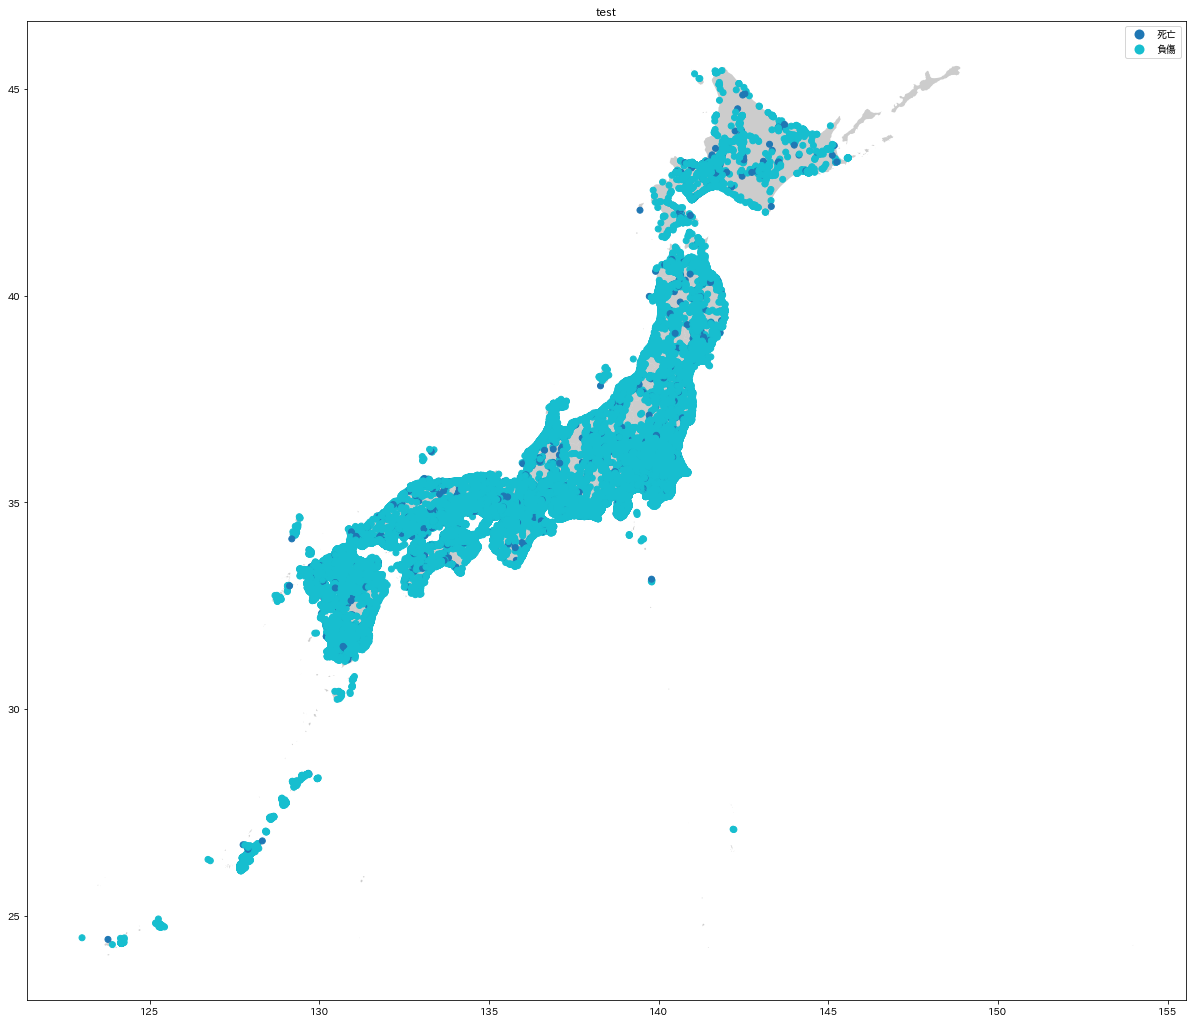

In [ ]:
fig, ax = plt.subplots(figsize=(24,18))
jp_geojson.plot(ax=ax, alpha=0.4, color='grey')
df_geo.plot(column='事故内容', ax=ax, legend=True)
plt.title('test')